## Aula 06 - Dados nD - netCDF
Nesta aula trabalhamos com dados 3 ou 4 D em formato netCDF. Utilizamos o pacote https://docs.xarray.dev/en/stable/ e trabalharemos com os dados da plataforma https://disc.gsfc.nasa.gov/

Baixando os dados do GESDISC: <br>
    Crie um login para você <br>
    Digite uma palavra-chave que descreva o dado que desejar <br>
    Baixe o dado para um determinado período

https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary?keywords=air%20quality

https://github.com/nasa/gesdisc-tutorials/blob/main/notebooks/How_to_Access_GES_DISC_Data_Using_Python.ipynb



In [18]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024'
listaDados = os.listdir(pastaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]


C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\notebooks


In [55]:
import xarray as xr
import netCDF4 as nc

dataset = nc.Dataset(pastaDados+'\\'+prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Comment: filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions: CF-1
    Institution: NASA Goddard Space Flight Center
    References: http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: V1
    TemporalRange: 2000-01-01 -> 2024-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: MERRA2_CNN_HAQAST_PM25
    GranuleID: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    ProductionDateTime: 2024-06-25T01:34:15.870456Z
    LongName: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    title: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    SouthernmostLatitude: -90.0
    NorthernmostLatitude: 90.0
    WesternmostLongitude: -180.0
  

In [56]:
# Acessando o dado de PM25
pm25 = dataset['MERRA2_CNN_Surface_PM25'][:]
print(pm25.shape) #(time,lat,lon)

(24, 361, 576)


35.0
-55.0


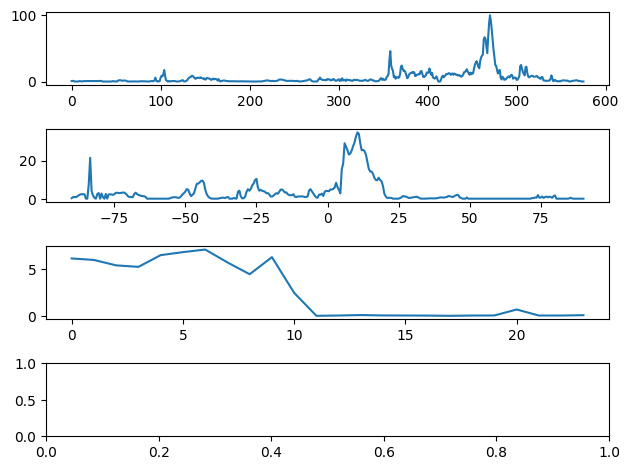

In [57]:
# Plotando o dado 1D
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4)

# Para o tempo - time = 0 em y = 250
ax[0].plot(pm25[0,250,:])
print(dataset['lat'][250])

# Para o tempo - time = 0 em x = 250
ax[1].plot(dataset['lat'][:],pm25[0,:,200])
print(dataset['lon'][200])

# Para todo o tempo em todo tempo
ax[2].plot(dataset['time'][:],pm25[:,250,100])

plt.tight_layout()

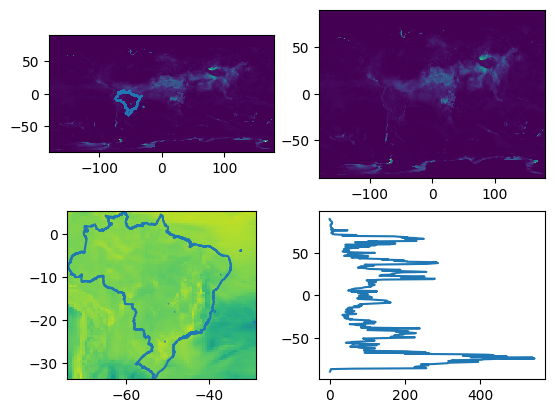

In [58]:
# Operações om o numpy
import numpy as np
import geopandas as gpd
import matplotlib

br = gpd.read_file(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\BR_Pais_2022\BR_Pais_2022.shp")
fig,ax = plt.subplots(2,2)

# média do dia em todos os locais
ax[0,0].pcolor(dataset['lon'][:],dataset['lat'], np.mean(pm25,axis=0))
br.boundary.plot(ax=ax[0,0])


ax[0,1].pcolor(dataset['lon'][:],dataset['lat'], np.mean(pm25,axis=0))

# Zoom no Brasil
ax[1,0].pcolor(dataset['lon'][:],dataset['lat'], np.mean(pm25,axis=0),
              norm=matplotlib.colors.LogNorm())


br.boundary.plot(ax=ax[1,0])
ax[1,0].set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax[1,0].set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])

# máxima emissão em todas as latitudes
ax[1,1].plot(np.max(np.max(pm25[:,:,:],axis=0),axis=1),dataset['lat'][:])

In [60]:
# Abrir todos os arquivos da pasta
os.chdir(pastaDados)
dataset = nc.MFDataset(prefixed)
dataset

ValueError: MFNetCDF4 only works with NETCDF3_* and NETCDF4_CLASSIC formatted files, not NETCDF4